# Explore here

In [24]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import statsmodels.api as sm
import numpy as np
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
train_data = pd.read_csv("/workspaces/pille9-boosting-algorithms/data/processed/train_data.csv")
test_data = pd.read_csv("/workspaces/pille9-boosting-algorithms/data/processed/test_data.csv")

In [26]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [27]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [28]:
# GradientBoostingClassifier default
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.938462,0.902703,0.916126,0.965318,0.847716,0.984536
Test,0.755102,0.632653,0.716601,0.720930,0.563636,0.869565
Diferencia,0.183359,0.270050,0.199525,0.244388,0.284079,0.114971


Objetivo: Mejorar el aprendizaje agregando más árboles y bajando la tasa de aprendizaje para que aprenda de manera más progresiva. min_samples_split y subsample para evitar sobreajuste.

In [29]:
# Distintos hiperparámetros 1
gb1 = GradientBoostingClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, min_samples_split=10, subsample=0.8, random_state=42)
gb1.fit(X_train, y_train)

y_pred_train1 = gb1.predict(X_train)
y_pred_test1 = gb1.predict(X_test)

get_metrics(y_train, y_test, y_pred_train1, y_pred_test1)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.993162,0.989744,0.989848,1.000000,0.979695,1.000000
Test,0.734694,0.597938,0.692984,0.690476,0.527273,0.858696
Diferencia,0.258469,0.391805,0.296864,0.309524,0.452423,0.141304


Objetivo: Reducir max_depth y learning_rate para reducir el sobreajuste.

In [30]:
# Distintos hiperparámetros 2
gb2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.02, max_depth=2, min_samples_split=10, subsample=0.8, random_state=42)
gb2.fit(X_train, y_train)

y_pred_train2 = gb2.predict(X_train)
y_pred_test2 = gb2.predict(X_test)

get_metrics(y_train, y_test, y_pred_train2, y_pred_test2)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.847863,0.746439,0.802848,0.850649,0.664975,0.940722
Test,0.755102,0.625000,0.712945,0.731707,0.545455,0.880435
Diferencia,0.092761,0.121439,0.089903,0.118942,0.119520,0.060287


Objetivo: Bajar learning_rate para hacer el modelo más estable, aumentar n_estimators para compensar el learning_rate más bajo y aumentar min_samples_split para mejorar la generalización.

In [31]:
gb3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=2, min_samples_split=15, subsample=0.8, random_state=42)
gb3.fit(X_train, y_train)

y_pred_train3 = gb3.predict(X_train)
y_pred_test3 = gb3.predict(X_test)

get_metrics(y_train, y_test, y_pred_train3, y_pred_test3)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.856410,0.765363,0.816788,0.850932,0.695431,0.938144
Test,0.755102,0.625000,0.712945,0.731707,0.545455,0.880435
Diferencia,0.101308,0.140363,0.103843,0.119224,0.149977,0.057710


In [33]:
# Grid Search
hyperparams = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [10, 15, 20],
    'subsample': [0.8, 0.9, 1.0]
}

grid = GridSearchCV(gb, hyperparams, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 400, 'subsample': 0.8}


In [ ]:
gb_opt = GradientBoostingClassifier(n_estimators=400, learning_rate=0.01, max_depth=3, min_samples_split=15, subsample=0.8, random_state=42)
gb_opt.fit(X_train, y_train)

y_pred_train_opt = gb_opt.predict(X_train)
y_pred_test_opt = gb_opt.predict(X_test)

get_metrics(y_train, y_test, y_pred_train_opt, y_pred_test_opt)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.894017,0.82967,0.862630,0.904192,0.766497,0.958763
Test,0.755102,0.62500,0.712945,0.731707,0.545455,0.880435
Diferencia,0.138915,0.20467,0.149686,0.172484,0.221043,0.078328


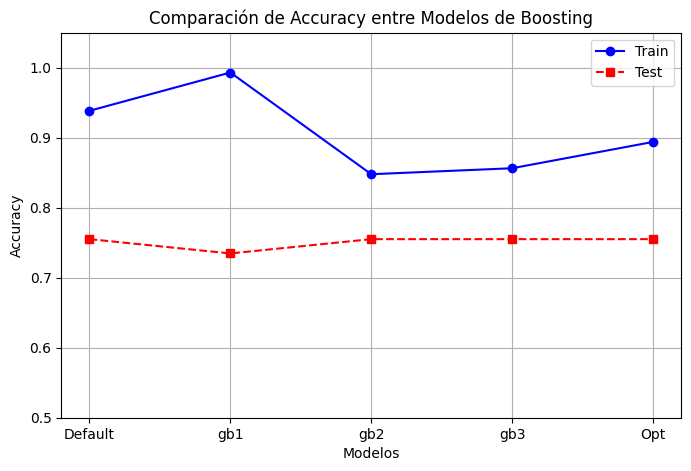

In [ ]:
# Graficar resultados
modelos = ["Default", "gb1", "gb2", "gb3", "Opt"]

accuracy_train = [0.938462, 0.993162, 0.847863, 0.856410, 0.894017]
accuracy_test = [0.755102, 0.734694, 0.755102, 0.755102, 0.755102]

plt.figure(figsize=(8, 5))
plt.plot(modelos, accuracy_train, marker='o', linestyle='-', color='b', label="Train")
plt.plot(modelos, accuracy_test, marker='s', linestyle='--', color='r', label="Test")

plt.title("Comparación de Accuracy entre Modelos de Boosting")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(True)

plt.show()

Se puede notar cómo el sobreajuste es más pronunciado en gb1, mientras que gb2, gb3 y Opt logran un mejor equilibrio entre entrenamiento y prueba.

COMPARACIÓN ENTRE LOS 3 MODELOS

Accuracy:

Random Forest optimizado tiene el mayor accuracy en el conjunto de test (0.7619), seguido de cerca por Gradient Boosting optimizado (0.7551) y Árbol de Decisión optimizado (0.7143).

F1 Score:

Árbol de Decisión optimizado tiene el mejor F1 score con un valor de 0.6667, mientras que Random Forest optimizado obtiene 0.6465 y Gradient Boosting optimizado 0.6250.

AUC:

Árbol de Decisión optimizado tiene el AUC más alto (0.7333), seguido de Random Forest optimizado (0.7257) y Gradient Boosting optimizado (0.7129).

Precision:

Random Forest optimizado tiene la mayor precision (0.7273), seguido de Gradient Boosting optimizado (0.7317) y Árbol de Decisión optimizado (0.5714).

Recall:

Árbol de Decisión optimizado tiene el mejor recall (0.8000), seguido de Random Forest optimizado (0.5818) y Gradient Boosting optimizado (0.5455).

Specificity:

Gradient Boosting optimizado tiene la mejor specificity (0.8804), seguido de Random Forest optimizado (0.8696) y Árbol de Decisión optimizado (0.6667).

CONCLUSIÓN:

Random Forest parece ser el modelo más equilibrado, destacando en accuracy y specificity, pero en este contexto podría interesar más el Decision Tree ya que, tiene mejor capacidad para identificar correctamente los positivos (mejor recall y AUC).